<a href="https://colab.research.google.com/github/Akhorramrouz/CS461/blob/main/kmeans_vs_kmeans_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
K-MEANS VS K-MEANS++: CODE-LEVEL COMPARISON
Understanding the Difference Through Implementation

This tutorial shows you EXACTLY what happens inside each algorithm
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns

sns.set_style("whitegrid")
np.random.seed(42)

print("=" * 70)
print("K-MEANS VS K-MEANS++: THE CODE DIFFERENCE")
print("=" * 70)

K-MEANS VS K-MEANS++: THE CODE DIFFERENCE



📊 Step 1: Creating Sample Data
----------------------------------------------------------------------
✅ Created 150 data points in 3 natural clusters
✅ Saved: sample_data.png


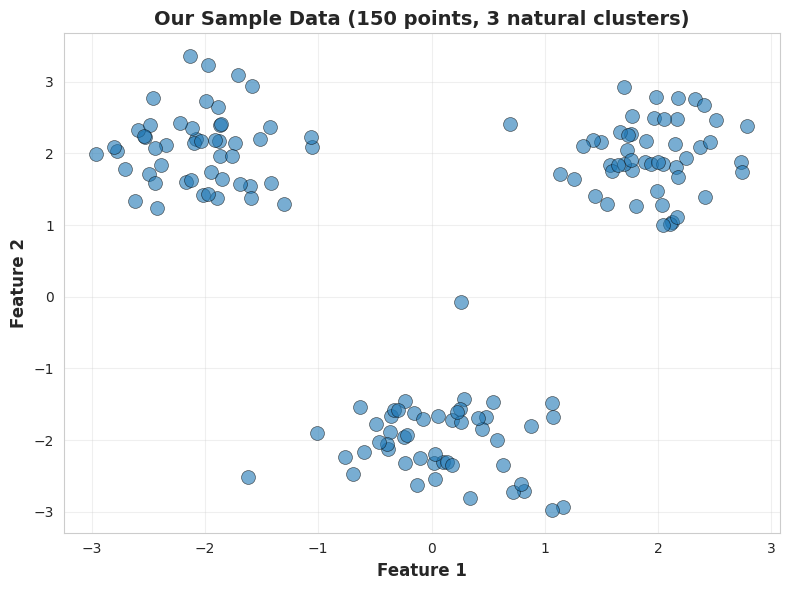

In [3]:
# ============================================
# CREATE SAMPLE DATA
# ============================================

print("\n📊 Step 1: Creating Sample Data")
print("-" * 70)

# Create 3 distinct clusters
cluster1 = np.random.randn(50, 2) * 0.5 + [2, 2]
cluster2 = np.random.randn(50, 2) * 0.5 + [-2, 2]
cluster3 = np.random.randn(50, 2) * 0.5 + [0, -2]

X = np.vstack([cluster1, cluster2, cluster3])
print(f"✅ Created {len(X)} data points in 3 natural clusters")

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
plt.title('Our Sample Data (150 points, 3 natural clusters)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sample_data.png', dpi=300, bbox_inches='tight')
print("✅ Saved: sample_data.png")
plt.show()

In [4]:
# ============================================
# IMPLEMENTATION 1: STANDARD K-MEANS
# ============================================

print("\n" + "=" * 70)
print("METHOD 1: STANDARD K-MEANS (Random Initialization)")
print("=" * 70)

def kmeans_random_init(X, k, random_state=None):
    """
    K-Means with RANDOM initialization

    This is the standard, naive approach.
    """
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]

    # STEP 1: Pick K random points as initial centroids
    # This is the KEY difference - completely random!
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices].copy()

    print(f"\n🎲 RANDOM INITIALIZATION:")
    print(f"   Selected random indices: {random_indices}")
    print(f"   Initial centroids:")
    for i, centroid in enumerate(centroids):
        print(f"   Centroid {i}: [{centroid[0]:.3f}, {centroid[1]:.3f}]")

    return centroids, random_indices


METHOD 1: STANDARD K-MEANS (Random Initialization)


In [5]:
# ============================================
# IMPLEMENTATION 2: K-MEANS++
# ============================================

print("\n" + "=" * 70)
print("METHOD 2: K-MEANS++ (Smart Initialization)")
print("=" * 70)

def kmeans_plusplus_init(X, k, random_state=None):
    """
    K-Means++ initialization

    This is the SMART approach that spreads centroids out.
    """
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    centroids = []
    centroid_indices = []

    # STEP 1: Choose first centroid randomly (same as K-Means)
    first_idx = np.random.randint(0, n_samples)
    centroids.append(X[first_idx].copy())
    centroid_indices.append(first_idx)

    print(f"\n🎯 K-MEANS++ INITIALIZATION:")
    print(f"\n1️⃣ First centroid (random):")
    print(f"   Index: {first_idx}")
    print(f"   Location: [{X[first_idx][0]:.3f}, {X[first_idx][1]:.3f}]")

    # STEPS 2-K: Choose remaining centroids smartly
    for i in range(1, k):
        # Calculate distance from each point to nearest existing centroid
        distances = np.array([
            min([np.linalg.norm(x - c)**2 for c in centroids])
            for x in X
        ])

        # Convert distances to probabilities (distance² / sum of all distance²)
        # Points FAR from existing centroids have HIGH probability
        probabilities = distances / distances.sum()

        # Choose next centroid with probability proportional to distance²
        next_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_idx].copy())
        centroid_indices.append(next_idx)

        print(f"\n{i+1}️⃣ Centroid {i+1} (weighted by distance²):")
        print(f"   Index: {next_idx}")
        print(f"   Location: [{X[next_idx][0]:.3f}, {X[next_idx][1]:.3f}]")
        print(f"   Distance² from nearest centroid: {distances[next_idx]:.3f}")
        print(f"   Selection probability: {probabilities[next_idx]:.4f}")

        # Show top 5 candidates and their probabilities
        top5_indices = np.argsort(probabilities)[-5:][::-1]
        print(f"   Top 5 candidates by probability:")
        for idx in top5_indices:
            print(f"      Point {idx}: prob={probabilities[idx]:.4f}, dist²={distances[idx]:.3f}")

    return np.array(centroids), centroid_indices


METHOD 2: K-MEANS++ (Smart Initialization)



COMPARISON: Running Both Methods

🎲 RANDOM INITIALIZATION:
   Selected random indices: [ 73  18 118]
   Initial centroids:
   Centroid 0: [-2.618, 1.340]
   Centroid 1: [2.104, 1.020]
   Centroid 2: [-1.013, -1.907]

🎯 K-MEANS++ INITIALIZATION:

1️⃣ First centroid (random):
   Index: 102
   Location: [-0.689, -2.469]

2️⃣ Centroid 2 (weighted by distance²):
   Index: 80
   Location: [-2.487, 2.394]
   Distance² from nearest centroid: 26.878
   Selection probability: 0.0105
   Top 5 candidates by probability:
      Point 1: prob=0.0142, dist²=36.434
      Point 32: prob=0.0141, dist²=36.072
      Point 89: prob=0.0141, dist²=36.061
      Point 35: prob=0.0139, dist²=35.670
      Point 3: prob=0.0139, dist²=35.648

3️⃣ Centroid 3 (weighted by distance²):
   Index: 10
   Location: [2.733, 1.887]
   Distance² from nearest centroid: 27.507
   Selection probability: 0.0250
   Top 5 candidates by probability:
      Point 3: prob=0.0253, dist²=27.846
      Point 41: prob=0.0252, dist²=27.740


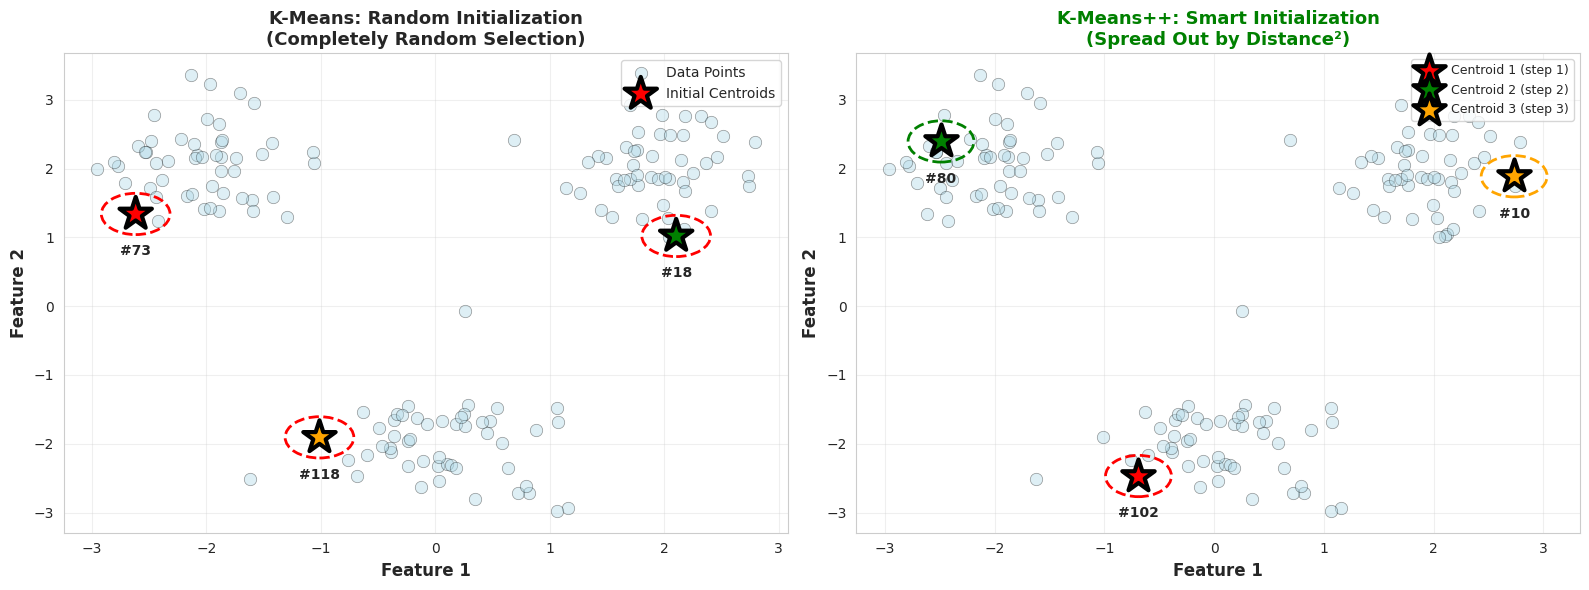

In [8]:
# ============================================
# COMPARE BOTH METHODS
# ============================================

print("\n" + "=" * 70)
print("COMPARISON: Running Both Methods")
print("=" * 70)

k = 3  # We want 3 clusters

# Method 1: Random initialization
centroids_random, indices_random = kmeans_random_init(X, k, random_state=42)

# Method 2: K-Means++ initialization
centroids_kmeanspp, indices_kmeanspp = kmeans_plusplus_init(X, k, random_state=42)


print("\n📊 Visualizing Initial Centroid Placement")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Random K-Means
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.4, s=80, c='lightblue', edgecolors='black', linewidth=0.5)
axes[0].scatter(centroids_random[:, 0], centroids_random[:, 1],
               c=['red', 'green', 'orange'], s=600, marker='*',
               edgecolors='black', linewidth=3, zorder=5)

# Draw circles around selected points
for idx, (cx, cy) in zip(indices_random, centroids_random):
    circle = plt.Circle((cx, cy), 0.3, color='red', fill=False, linewidth=2, linestyle='--')
    axes[0].add_patch(circle)
    axes[0].text(cx, cy-0.6, f"#{idx}", ha='center', fontsize=10, fontweight='bold')

axes[0].set_xlabel('Feature 1', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Feature 2', fontsize=12, fontweight='bold')
axes[0].set_title('K-Means: Random Initialization\n(Completely Random Selection)',
                 fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Data Points', 'Initial Centroids'], loc='upper right')

# Plot 2: K-Means++
axes[1].scatter(X[:, 0], X[:, 1], alpha=0.4, s=80, c='lightblue', edgecolors='black', linewidth=0.5)

# Color centroids by selection order
colors_pp = ['red', 'green', 'orange']
for i, (cx, cy) in enumerate(centroids_kmeanspp):
    axes[1].scatter(cx, cy, c=colors_pp[i], s=600, marker='*',
                   edgecolors='black', linewidth=3, zorder=5,
                   label=f'Centroid {i+1} (step {i+1})')
    circle = plt.Circle((cx, cy), 0.3, color=colors_pp[i], fill=False, linewidth=2, linestyle='--')
    axes[1].add_patch(circle)
    axes[1].text(cx, cy-0.6, f"#{indices_kmeanspp[i]}", ha='center', fontsize=10, fontweight='bold')

axes[1].set_xlabel('Feature 1', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Feature 2', fontsize=12, fontweight='bold')
axes[1].set_title('K-Means++: Smart Initialization\n(Spread Out by Distance²)',
                 fontsize=13, fontweight='bold', color='green')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('initialization_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: initialization_comparison.png")
plt.show()

In [9]:
# ============================================
# CALCULATE INITIAL SPREAD QUALITY
# ============================================

print("\n📏 Measuring Initial Centroid Quality")
print("-" * 70)

def calculate_centroid_spread(centroids):
    """Calculate how spread out the centroids are"""
    distances = []
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            distances.append(dist)
    return np.mean(distances), np.min(distances)

spread_random, min_dist_random = calculate_centroid_spread(centroids_random)
spread_kmeanspp, min_dist_kmeanspp = calculate_centroid_spread(centroids_kmeanspp)

print(f"\nRandom K-Means:")
print(f"  Average distance between centroids: {spread_random:.3f}")
print(f"  Minimum distance between centroids: {min_dist_random:.3f}")

print(f"\nK-Means++:")
print(f"  Average distance between centroids: {spread_kmeanspp:.3f}")
print(f"  Minimum distance between centroids: {min_dist_kmeanspp:.3f}")

if spread_kmeanspp > spread_random:
    print(f"\n✅ K-Means++ centroids are {(spread_kmeanspp/spread_random - 1)*100:.1f}% more spread out!")
else:
    print(f"\n⚠️ In this run, random initialization got lucky!")


📏 Measuring Initial Centroid Quality
----------------------------------------------------------------------

Random K-Means:
  Average distance between centroids: 4.211
  Minimum distance between centroids: 3.622

K-Means++:
  Average distance between centroids: 5.323
  Minimum distance between centroids: 5.184

✅ K-Means++ centroids are 26.4% more spread out!



RUNNING FULL K-MEANS ALGORITHM

🔄 Method 1: Random Initialization
   Converged after 3 iterations

🔄 Method 2: K-Means++ Initialization
   Converged after 2 iterations

📊 FINAL RESULTS:
----------------------------------------------------------------------
Random K-Means:
  Iterations to converge: 3
  Final inertia: 71.546

K-Means++:
  Iterations to converge: 2
  Final inertia: 71.546

✅ K-Means++ converged 1 iterations faster!

📊 Visualizing Final Clustering Results
----------------------------------------------------------------------
✅ Saved: final_clustering_comparison.png


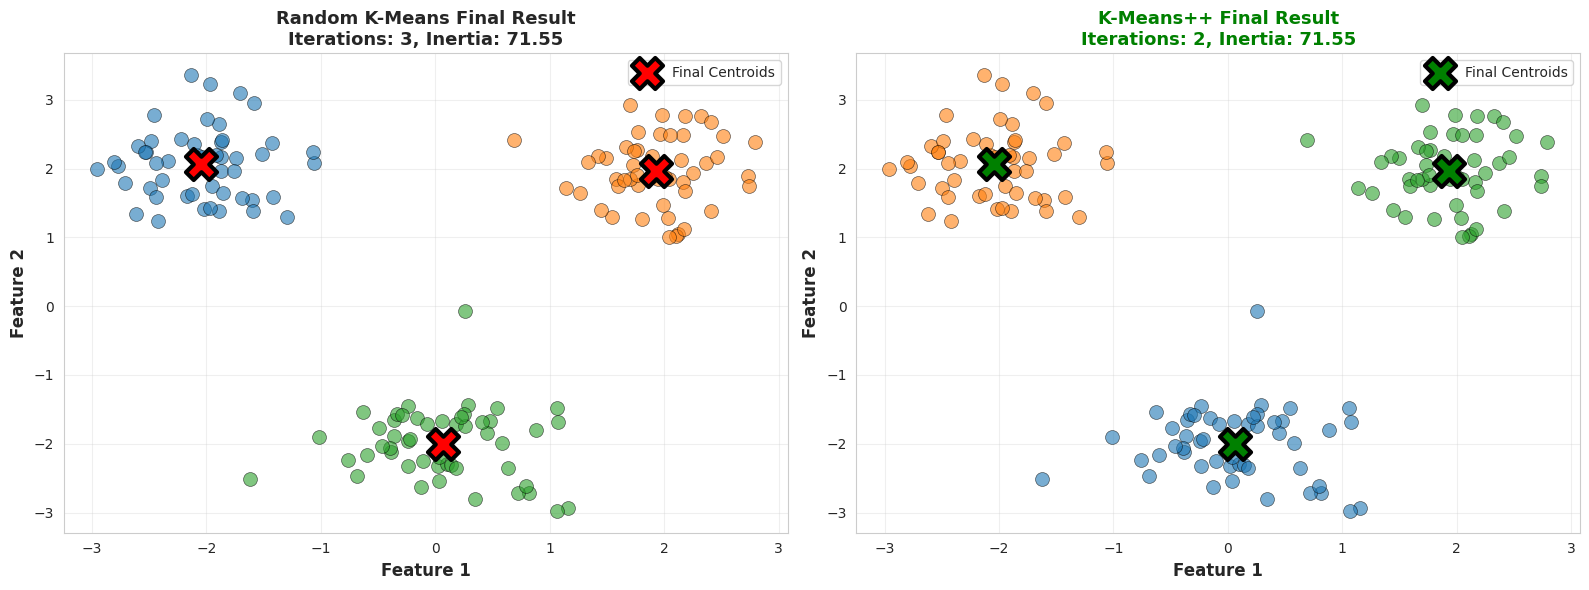

In [10]:
# ============================================
# FULL K-MEANS ALGORITHM IMPLEMENTATION
# ============================================

print("\n" + "=" * 70)
print("RUNNING FULL K-MEANS ALGORITHM")
print("=" * 70)

def full_kmeans(X, initial_centroids, max_iters=100):
    """
    Complete K-Means algorithm (works for both methods)
    """
    centroids = initial_centroids.copy()
    n_samples = X.shape[0]

    for iteration in range(max_iters):
        # Assign each point to nearest centroid
        distances = np.array([[np.linalg.norm(x - c) for c in centroids] for x in X])
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(len(centroids))])

        # Check convergence
        if np.allclose(centroids, new_centroids):
            print(f"   Converged after {iteration + 1} iterations")
            return new_centroids, labels, iteration + 1

        centroids = new_centroids

    return centroids, labels, max_iters

# Run both methods
print("\n🔄 Method 1: Random Initialization")
final_centroids_random, labels_random, iters_random = full_kmeans(X, centroids_random)

print("\n🔄 Method 2: K-Means++ Initialization")
final_centroids_kmeanspp, labels_kmeanspp, iters_kmeanspp = full_kmeans(X, centroids_kmeanspp)

# Calculate final inertia (quality metric)
def calculate_inertia(X, labels, centroids):
    """Calculate within-cluster sum of squares"""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

inertia_random = calculate_inertia(X, labels_random, final_centroids_random)
inertia_kmeanspp = calculate_inertia(X, labels_kmeanspp, final_centroids_kmeanspp)

print("\n📊 FINAL RESULTS:")
print("-" * 70)
print(f"Random K-Means:")
print(f"  Iterations to converge: {iters_random}")
print(f"  Final inertia: {inertia_random:.3f}")

print(f"\nK-Means++:")
print(f"  Iterations to converge: {iters_kmeanspp}")
print(f"  Final inertia: {inertia_kmeanspp:.3f}")

if iters_kmeanspp < iters_random:
    print(f"\n✅ K-Means++ converged {iters_random - iters_kmeanspp} iterations faster!")
if inertia_kmeanspp < inertia_random:
    print(f"✅ K-Means++ achieved {((inertia_random - inertia_kmeanspp)/inertia_random)*100:.1f}% better clustering!")

# ============================================
# VISUALIZE FINAL RESULTS
# ============================================

print("\n📊 Visualizing Final Clustering Results")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Random K-Means final result
for i in range(k):
    cluster_points = X[labels_random == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1],
                   alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
axes[0].scatter(final_centroids_random[:, 0], final_centroids_random[:, 1],
               c='red', s=500, marker='X', edgecolors='black', linewidth=3,
               label='Final Centroids', zorder=5)
axes[0].set_xlabel('Feature 1', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Feature 2', fontsize=12, fontweight='bold')
axes[0].set_title(f'Random K-Means Final Result\nIterations: {iters_random}, Inertia: {inertia_random:.2f}',
                 fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: K-Means++ final result
for i in range(k):
    cluster_points = X[labels_kmeanspp == i]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1],
                   alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
axes[1].scatter(final_centroids_kmeanspp[:, 0], final_centroids_kmeanspp[:, 1],
               c='green', s=500, marker='X', edgecolors='black', linewidth=3,
               label='Final Centroids', zorder=5)
axes[1].set_xlabel('Feature 1', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Feature 2', fontsize=12, fontweight='bold')
axes[1].set_title(f'K-Means++ Final Result\nIterations: {iters_kmeanspp}, Inertia: {inertia_kmeanspp:.2f}',
                 fontsize=13, fontweight='bold', color='green')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('final_clustering_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: final_clustering_comparison.png")
plt.show()

In [11]:

# ============================================
# DEMONSTRATING BAD LUCK SCENARIO
# ============================================

print("\n" + "=" * 70)
print("WORST CASE SCENARIO: When Random Init Fails")
print("=" * 70)

def worst_case_random_init(X, k):
    """
    Intentionally bad initialization - all centroids in same cluster
    """
    # Pick all centroids from first cluster
    bad_indices = np.random.choice(50, k, replace=False)  # First 50 points are cluster1
    return X[bad_indices].copy(), bad_indices

centroids_bad, indices_bad = worst_case_random_init(X, k)

print(f"\n❌ BAD INITIALIZATION: All centroids in same region")
print(f"   Selected indices: {indices_bad}")

final_centroids_bad, labels_bad, iters_bad = full_kmeans(X, centroids_bad)
inertia_bad = calculate_inertia(X, labels_bad, final_centroids_bad)

print(f"\n📊 Results with Bad Initialization:")
print(f"  Iterations to converge: {iters_bad}")
print(f"  Final inertia: {inertia_bad:.3f}")
print(f"  Compared to K-Means++: {((inertia_bad - inertia_kmeanspp)/inertia_kmeanspp)*100:.1f}% WORSE")

# ============================================
# SUMMARY
# ============================================

print("\n" + "=" * 70)
print("KEY DIFFERENCES SUMMARY")
print("=" * 70)

print("""
🎲 RANDOM K-MEANS INITIALIZATION:
   Code: indices = np.random.choice(n_samples, k, replace=False)

   Pros:
   ✓ Simple to implement
   ✓ Fast (O(k))

   Cons:
   ✗ Can pick bad starting positions
   ✗ May need many runs (n_init=10)
   ✗ Results vary between runs
   ✗ Risk of poor convergence

🎯 K-MEANS++ INITIALIZATION:
   Code:
   1. First centroid: random
   2. For each next centroid:
      - distances = [min distance to existing centroids]²
      - probabilities = distances / sum(distances)
      - next_centroid = weighted random choice by probabilities

   Pros:
   ✓ Smart spreading of initial centroids
   ✓ Usually needs only 1 run
   ✓ Faster convergence
   ✓ More consistent results
   ✓ Better final clustering quality

   Cons:
   ✗ Slightly more complex (O(k*n))
   ✗ Still has some randomness

🏆 WINNER: K-Means++ (that's why it's the default!)
""")

print("\n" + "=" * 70)
print("🎓 LESSON COMPLETE!")
print("=" * 70)
print("\nNow you understand EXACTLY what makes K-Means++ better!")
print("The key: Probability proportional to DISTANCE SQUARED")


WORST CASE SCENARIO: When Random Init Fails

❌ BAD INITIALIZATION: All centroids in same region
   Selected indices: [31  5 32]
   Converged after 6 iterations

📊 Results with Bad Initialization:
  Iterations to converge: 6
  Final inertia: 589.158
  Compared to K-Means++: 723.5% WORSE

KEY DIFFERENCES SUMMARY

🎲 RANDOM K-MEANS INITIALIZATION:
   Code: indices = np.random.choice(n_samples, k, replace=False)
   
   Pros:
   ✓ Simple to implement
   ✓ Fast (O(k))
   
   Cons:
   ✗ Can pick bad starting positions
   ✗ May need many runs (n_init=10)
   ✗ Results vary between runs
   ✗ Risk of poor convergence

🎯 K-MEANS++ INITIALIZATION:
   Code: 
   1. First centroid: random
   2. For each next centroid:
      - distances = [min distance to existing centroids]²
      - probabilities = distances / sum(distances)
      - next_centroid = weighted random choice by probabilities
   
   Pros:
   ✓ Smart spreading of initial centroids
   ✓ Usually needs only 1 run
   ✓ Faster convergence
   ✓ M